<a href="https://colab.research.google.com/github/v-3sg/predictive_maintenance/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set can be found here: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

**Attribute Information**

The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000

product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

**Import and Load Data**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load and confirm data loading
df = pd.read_csv ('/content/ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
#rename typo (UDI to UID)
df.rename(columns={'UDI':'UID'},
inplace=True)

**Clean the Data**

In [4]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

**--> Data types seem appropriate for each column**

In [5]:
df['Product ID'].value_counts()

M24071    1
M21261    1
M22293    1
M20586    1
M21349    1
         ..
M15074    1
L48859    1
L47261    1
H32547    1
L55027    1
Name: Product ID, Length: 10000, dtype: int64

In [6]:
#check for duplicates
df.duplicated().any()

False

**--> No duplicates**

In [7]:
df.isnull().sum()

UID                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

**--> No null values**

**Visualize/Explore the Data**

In [8]:
df.describe()

,UID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


**--> Data values seem appropriate for the numerical columns.**

**--> General observations**

1. UID column appears to be unique for each line; drop this column in favor of other unique item identifier (e.g., Product ID).

2. Type is part of Product ID; drop Type column.

3. TWF, HDF, PWF, OSF, RNF are specific types of failures and shouldn't be included for initial binary classification target (Machine failure); they may be used as a follow up.

In [9]:
df2 = df.drop(['UID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis =1)

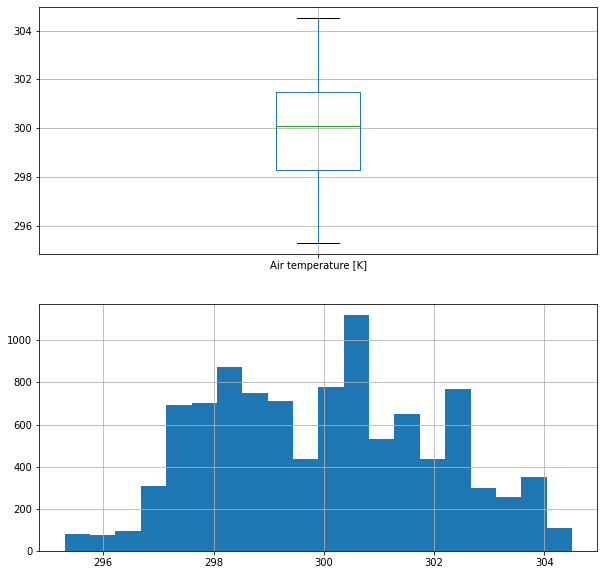

In [10]:
#use histogram/boxplot to visualize numerical data values

plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df2.boxplot(column = 'Air temperature [K]')

plt.subplot(2, 1, 2)
df2['Air temperature [K]'].hist(bins = 20);


**--> Air temperature [K]**

Boxplot shows no outliers.

Histogram (bins set to 20), shows possibly two peaks (bimodal).

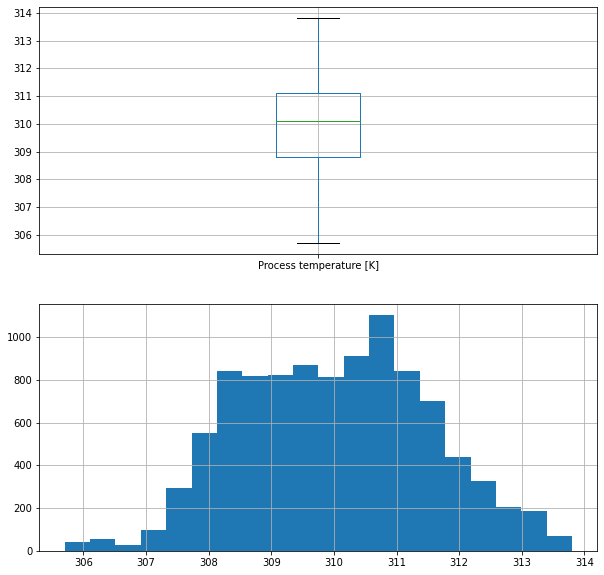

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df2.boxplot(column = 'Process temperature [K]')

plt.subplot(2, 1, 2)
df2['Process temperature [K]'].hist(bins = 20);

**--> Process temperature [K]**

Boxplot shows no outliers.

Histogram (bins set to 20) shows bell curve distribution.

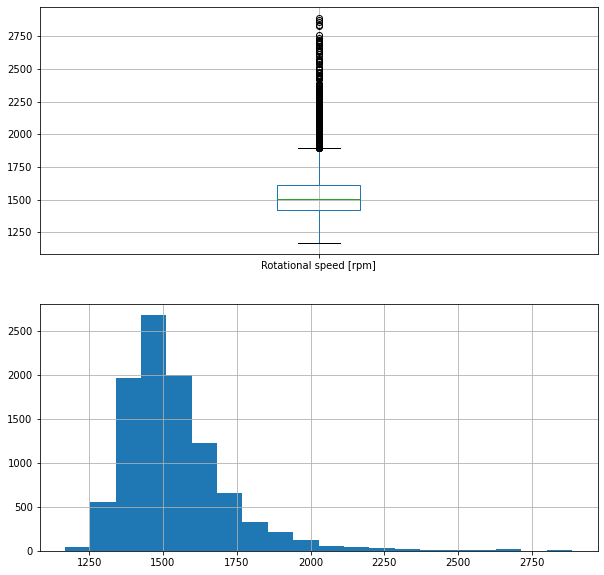

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df2.boxplot(column = 'Rotational speed [rpm]')

plt.subplot(2, 1, 2)
df2['Rotational speed [rpm]'].hist(bins = 20);

**--> Rotational speed [rpm]**

Boxplot shows a lot of outliers above the upper whisker.

Histogram shows positive skew with most values on the left side of the histogram.


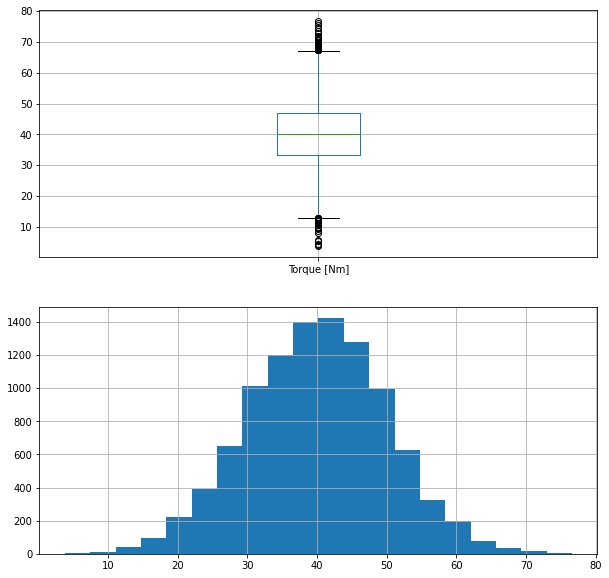

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df2.boxplot(column = 'Torque [Nm]')

plt.subplot(2, 1, 2)
df2['Torque [Nm]'].hist(bins = 20);

**--> Torque [Nm]**

Boxplot shows lots of outliers beyond the lower and upper whiskers.

Histogram shows bell curve normal distribution.

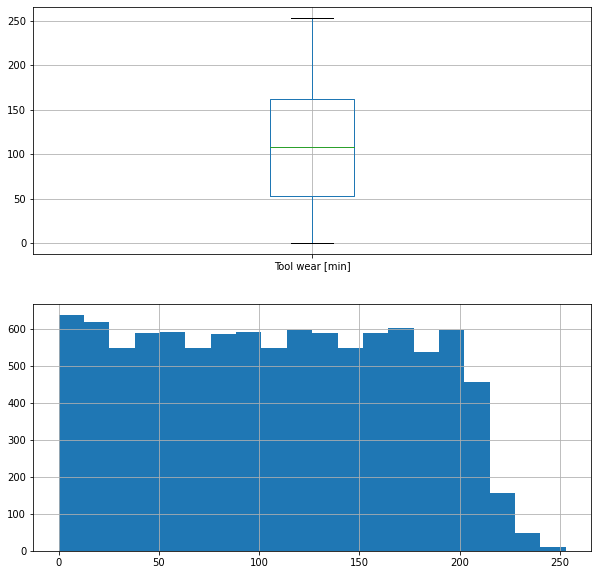

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
df2.boxplot(column = 'Tool wear [min]')

plt.subplot(2, 1, 2)
df2['Tool wear [min]'].hist(bins = 20);

**--> Tool wear [min]**

Boxplot shows no outliers.

Histogram shows a uniform distribution (rectangle shaped).

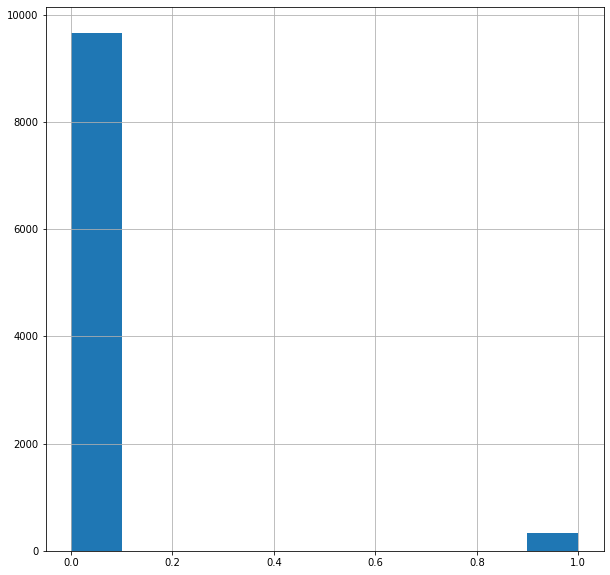

In [15]:
plt.figure(figsize=(10,10))

df2['Machine failure'].hist();

**--> Machine failure**

This column is a binary classification so a boxplot will be irrelavent; histogram shows a majority of times that machine failure does not occur.

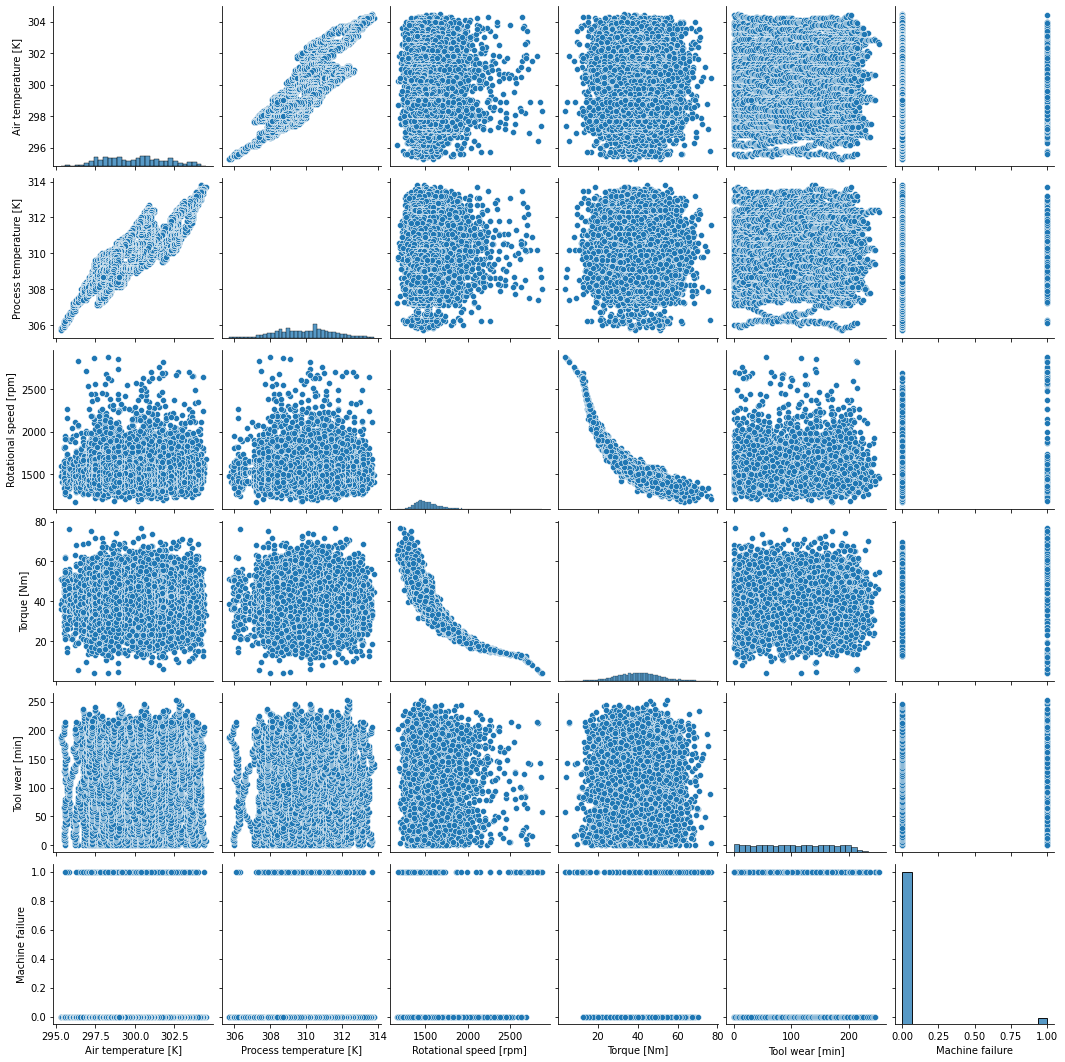

In [16]:
#pairplot of dataframe
sns.pairplot(df2);

**--> Based on pairplot of entire dataframe, there seems to be correlation between a) air temperature and process temperature and b) rotational speed and torque.**

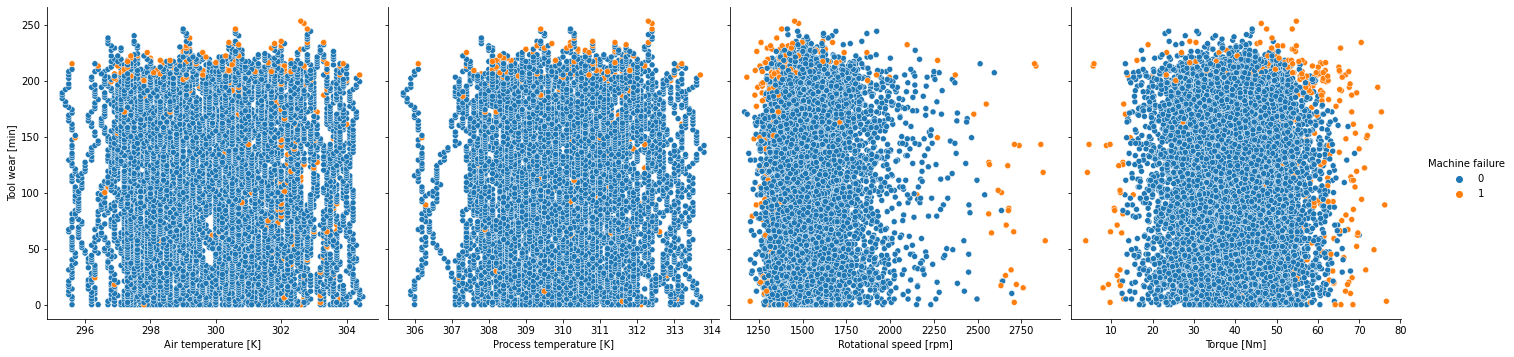

In [17]:
#scatterplot between each of the features and the target 

sns.pairplot(df2,
             x_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'],
             y_vars = ['Tool wear [min]'],
             hue = 'Machine failure', height = 5);

**--> From the above pairplots, machine failure as indicated by the orange dots seems to occur around the edges of the distributions for total wear and the other paired variables (air temperature, process temperature, rotational speed, torque).**

**--> Of interest are the clusters at a) the upper left corner of the tool wear vs. rotational speed and b) the upper right corner of the tool wear vs. torque pairplots.**

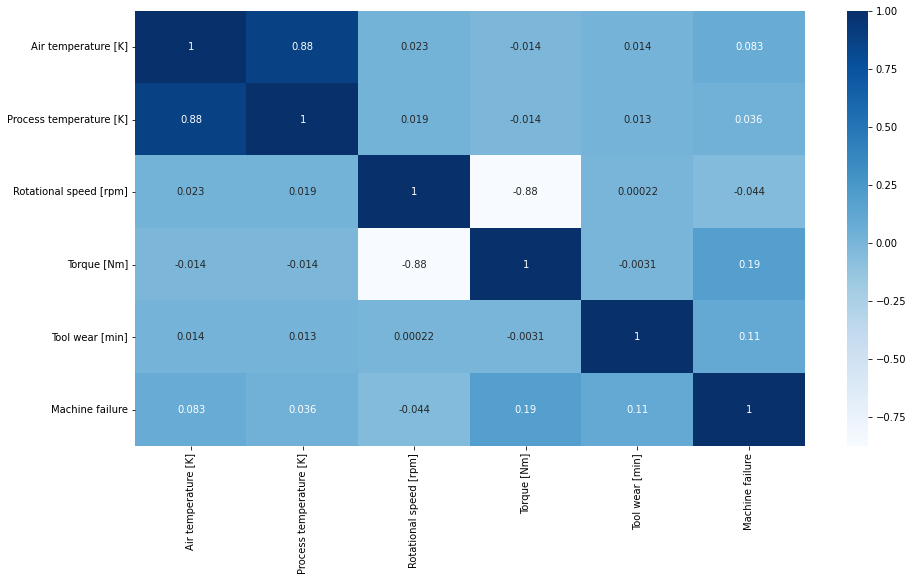

In [18]:
#oversimplified heat map
corr = df2.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = 'Blues', annot = True);

**--> Correlation heat map indicates a) positive correlation between air temperature and process temperature (0.88), b) negative correlation between rotational speed and torque (-0.88), and c) weak positive correlation between torque and machine failure (0.19).**

In [22]:
#features matrix is X
#target vector is y
X = df2.drop(columns = 'Product ID')
y = df2['Product ID']

In [27]:
# Train test split
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Instantiate Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df2 = scaler.fit_transform(X)

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
#logistic regression (l2 default)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
print('Training accuracy (L2 default):', log_reg.score(X_train, y_train))
print('Test accuracy (L2 default):', log_reg.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy (L2 default): 0.7776
Test accuracy (L2 default): 0.0


In [ ]:
# define a dictionary of the parameters you want to tune and the values you want to try out
params = {'penalty': ['l1', 'l2'],
          'C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
          'solver': ['liblinear', 'lbfgs'],
          'multi_class': ['ovr', 'auto', 'multinomial'],
          'max_iter': [500, 1000, 1500, 2000]}

# instantiate and fit gridsearch
gs = GridSearchCV(LogisticRegression(), param_grid = params)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate KNN model
knn = KNeighborsClassifier()
#fit KNN
knn.fit(X_train, y_train)
#calculate classification accuracy
print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

In [ ]:
# define a dictionary of the parameters you want to tune and the values you want to try out
params_kn = {'n_neighbors': [1, 5, 10, 25, 75, 99]}

# instantiate and fit gridsearch
gs_kn = GridSearchCV(KNeighborsClassifier(), param_grid = params_kn)
gs_kn.fit(X_train, y_train)

In [ ]:
gs.best_params_

**Gradient Boost**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

**First gradient boost is going for 1 hour 25 minutes 23 seconds... Re-examine code and try again later...**

In [30]:
# Instantiate and fit gradient boosting classifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

In [ ]:
#instantiate and fit LightGBM

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

In [ ]:
print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))

In [ ]:
# Instantiate and fit XGBoost

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))